# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Install the yfinance library 

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

# Define the ticker symbol for Tesla

In [ ]:

ticker_symbol = 'TSLA'

# Fetch the data

In [5]:

tesla_data = yf.Ticker(ticker_symbol)

In [6]:

historical_data = tesla_data.history(period='10y')

# Display the historical data

In [21]:
print("Historical Stock Prices for TSLA:")
print(historical_data)

Historical Stock Prices for TSLA:
                                 Open        High         Low       Close  \
Date                                                                        
2015-02-27 00:00:00-05:00   13.793333   13.903333   13.520000   13.556000   
2015-03-02 00:00:00-05:00   13.513333   13.556000   13.055333   13.155333   
2015-03-03 00:00:00-05:00   13.120667   13.349333   13.021333   13.304000   
2015-03-04 00:00:00-05:00   13.283333   13.501333   13.147333   13.496000   
2015-03-05 00:00:00-05:00   13.523333   13.746000   13.343333   13.375333   
...                               ...         ...         ...         ...   
2025-02-20 00:00:00-05:00  361.510010  362.299988  348.000000  354.399994   
2025-02-21 00:00:00-05:00  353.440002  354.980011  334.420013  337.799988   
2025-02-24 00:00:00-05:00  338.140015  342.399994  324.700012  330.529999   
2025-02-25 00:00:00-05:00  327.019989  328.890015  297.250000  302.799988   
2025-02-26 00:00:00-05:00  303.709991  309

In [28]:
TSLA_info = tesla_data.info


In [29]:

print(TSLA_info)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

In [34]:
historical_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-02-27 00:00:00-05:00,13.793333,13.903333,13.520000,13.556000,58231500,0.0,0.0
2015-03-02 00:00:00-05:00,13.513333,13.556000,13.055333,13.155333,118831500,0.0,0.0
2015-03-03 00:00:00-05:00,13.120667,13.349333,13.021333,13.304000,66484500,0.0,0.0
2015-03-04 00:00:00-05:00,13.283333,13.501333,13.147333,13.496000,63330000,0.0,0.0
2015-03-05 00:00:00-05:00,13.523333,13.746000,13.343333,13.375333,73155000,0.0,0.0


In [35]:
import matplotlib.pyplot as plt

In [36]:
dividends = tesla_data.dividends
print(dividends)

Series([], Name: Dividends, dtype: float64)


# Check Basic Statistics and Data Types

In [44]:

print(historical_data.info())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-02-27 00:00:00-05:00 to 2025-02-26 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2515 non-null   float64
 1   High          2515 non-null   float64
 2   Low           2515 non-null   float64
 3   Close         2515 non-null   float64
 4   Volume        2515 non-null   int64  
 5   Dividends     2515 non-null   float64
 6   Stock Splits  2515 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2 KB
None


In [45]:
print(historical_data.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [46]:
print(historical_data.describe())

              Open         High          Low        Close        Volume  \
count  2515.000000  2515.000000  2515.000000  2515.000000  2.515000e+03   
mean    121.164826   123.826077   118.292377   121.102992  1.123459e+08   
std     118.094231   120.733068   115.129785   117.938093  7.395841e+07   
min       9.488000    10.331333     9.403333     9.578000  1.062000e+07   
25%      17.547000    17.818334    17.240001    17.546667  6.716600e+07   
50%      38.379333    39.633331    37.205334    38.146667  9.288270e+07   
75%     224.748337   229.980003   219.049995   224.508339  1.297030e+08   
max     475.899994   488.540009   457.510010   479.859985  9.140820e+08   

       Dividends  Stock Splits  
count     2515.0   2515.000000  
mean         0.0      0.003181  
std          0.0      0.116250  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      5.000000  


# Handle Missing Values

In [56]:
print(historical_data.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


# Calculate Z-scores and Identify outliers

In [62]:
from scipy import stats


historical_data['Z-Score'] = stats.zscore(historical_data['Close'])

outliers_z = historical_data[(historical_data['Z-Score'] > 3) | (historical_data['Z-Score'] < -3)]

print(outliers_z)

                                 Open       High        Low       Close  \
Date                                                                      
2024-12-17 00:00:00-05:00  475.899994  483.98999  457.51001  479.859985   

                              Volume  Dividends  Stock Splits   Z-Score  
Date                                                                     
2024-12-17 00:00:00-05:00  131223000        0.0           0.0  3.042514  


# Box plot for visualizing outliers

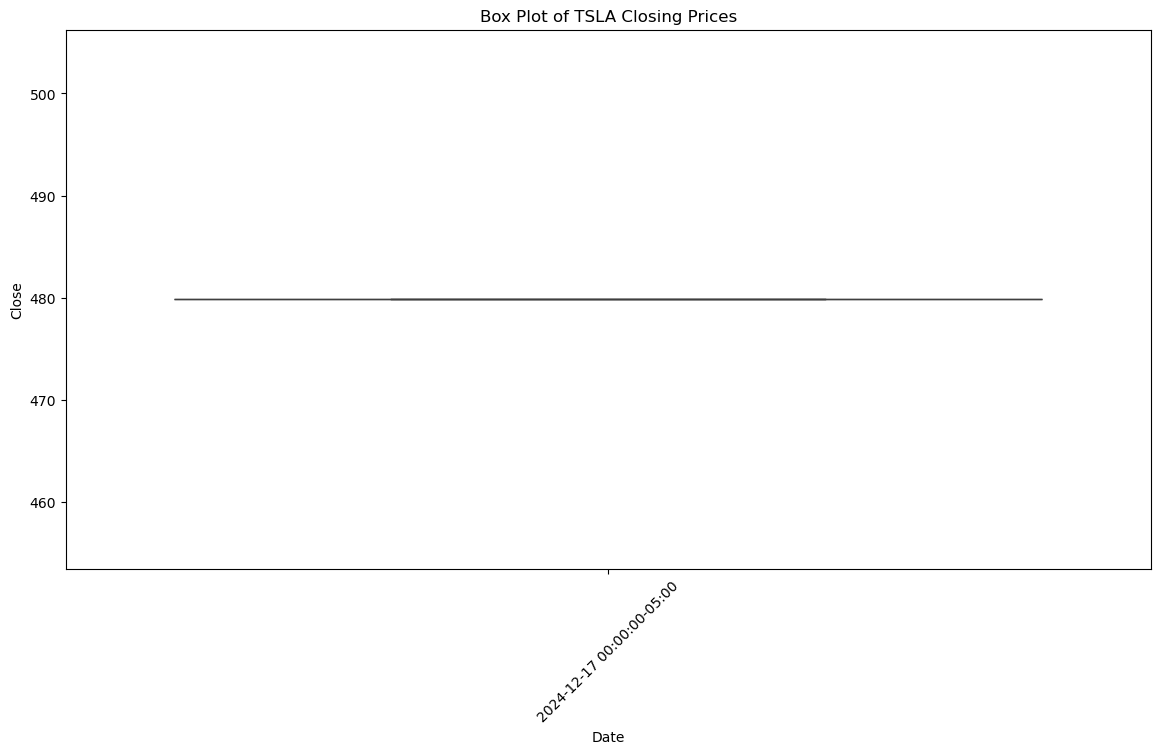

In [61]:


plt.figure(figsize=(14, 7))

sns.boxplot(x=outliers_z.index, y='Close', data=outliers_z)
plt.title('Box Plot of TSLA Closing Prices')
plt.xticks(rotation=45)
plt.show()

# Min-Max Scaling Normalization and Scaling Techniques 

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
historical_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(historical_data[['Open', 'High', 'Low', 'Close', 'Volume']])
print(historical_data.head(30))

                               Open      High       Low     Close    Volume  \
Date                                                                          
2015-02-27 00:00:00-05:00  0.009231  0.007470  0.009187  0.008459  0.052699   
2015-03-02 00:00:00-05:00  0.008630  0.006743  0.008150  0.007607  0.119774   
2015-03-03 00:00:00-05:00  0.007789  0.006311  0.008074  0.007923  0.061834   
2015-03-04 00:00:00-05:00  0.008137  0.006629  0.008355  0.008331  0.058342   
2015-03-05 00:00:00-05:00  0.008652  0.007141  0.008793  0.008075  0.069217   
2015-03-06 00:00:00-05:00  0.008132  0.006382  0.007602  0.007118  0.099690   
2015-03-09 00:00:00-04:00  0.007443  0.005509  0.007022  0.006692  0.100093   
2015-03-10 00:00:00-04:00  0.006595  0.005371  0.006925  0.006613  0.080884   
2015-03-11 00:00:00-04:00  0.006980  0.005745  0.007433  0.007098  0.070842   
2015-03-12 00:00:00-04:00  0.007351  0.005504  0.007245  0.006719  0.057135   
2015-03-13 00:00:00-04:00  0.006665  0.005127  0.006

# Closing Price Over Time

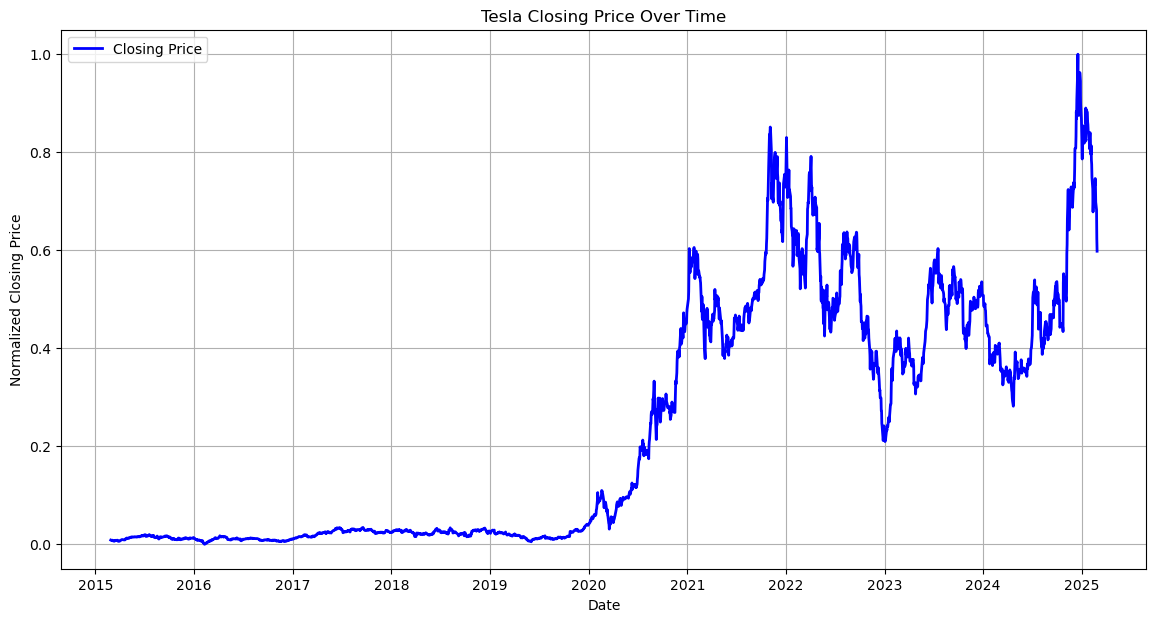

In [67]:
plt.figure(figsize=(14, 7))
plt.plot(historical_data.index, historical_data['Close'], label='Closing Price', color='blue', linewidth=2)
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price')
plt.grid()
plt.legend()
plt.show()

# Multiply by 100 to convert to percentage

In [71]:
historical_data['Daily Percentage Change'] = historical_data['Close'].pct_change() * 100  
#print(historical_data)

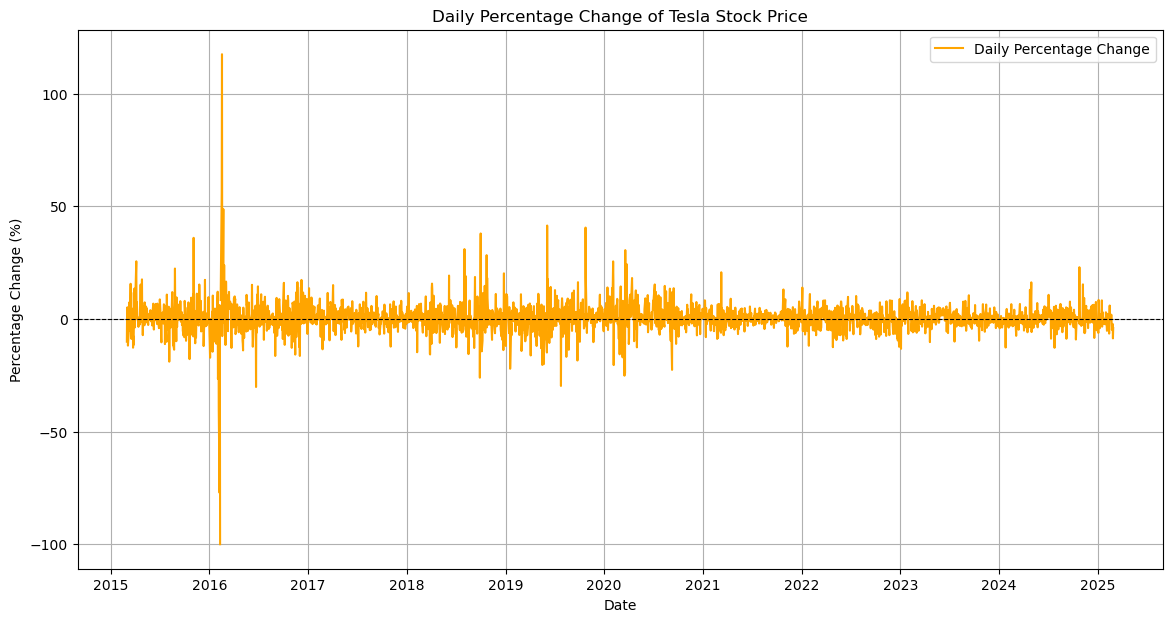

In [72]:
plt.figure(figsize=(14, 7))
plt.plot(historical_data.index, historical_data['Daily Percentage Change'], label='Daily Percentage Change', color='orange')
plt.title('Daily Percentage Change of Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a line at 0 for reference
plt.grid()
plt.legend()
plt.show()

# calculating rolling means and standard deviations

In [73]:
window_size = 365
historical_data['Rolling Mean'] = historical_data['Close'].rolling(window=window_size).mean()
historical_data['Rolling Std'] = historical_data['Close'].rolling(window=window_size).std()

# Create the plot means and standard deviations

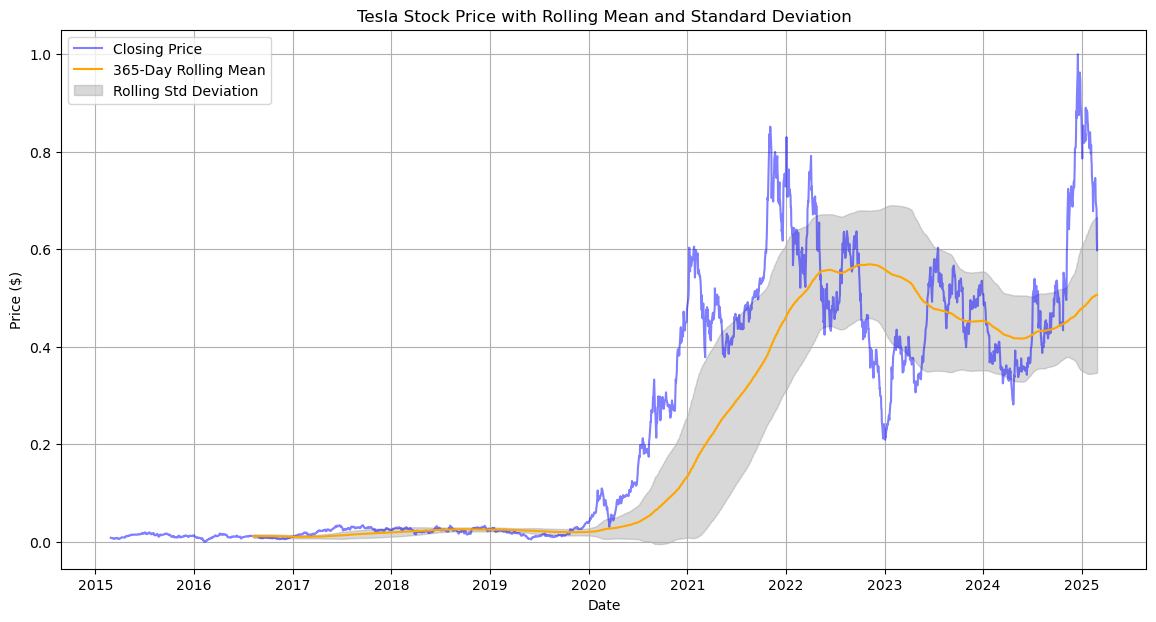

In [74]:
plt.figure(figsize=(14, 7))
plt.plot(historical_data.index, historical_data['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(historical_data.index, historical_data['Rolling Mean'], label='365-Day Rolling Mean', color='orange')
plt.fill_between(historical_data.index, historical_data['Rolling Mean'] - historical_data['Rolling Std'], 
                 historical_data['Rolling Mean'] + historical_data['Rolling Std'], color='gray', alpha=0.3, label='Rolling Std Deviation')
plt.title('Tesla Stock Price with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

# Seasonality and Trends

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [77]:

historical_data.sort_index(inplace=True)


ts = historical_data['Close']


In [79]:
# Check for zero or negative values
if (ts <= 0).any():
    print("Warning: The time series contains zero or negative values. Using additive model.")
    model_type = 'additive'
else:
    model_type = 'multiplicative'

decomposition = seasonal_decompose(ts, model=model_type, period=365)

#decomposition = seasonal_decompose(ts, model='multiplicative', period=365)

# Plot the decomposed components

<Figure size 1400x1000 with 0 Axes>

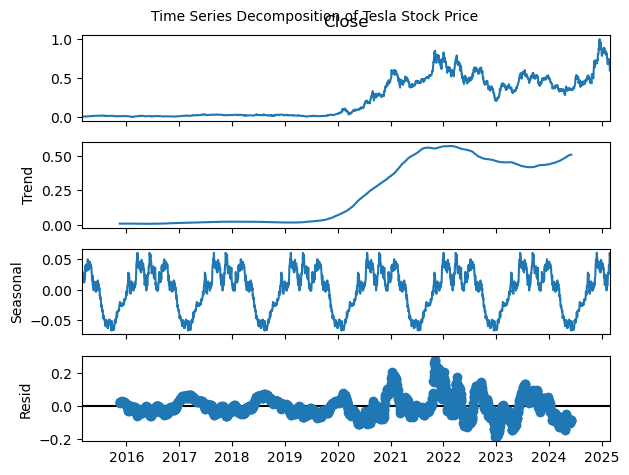

In [83]:

plt.figure(figsize=(14, 10))
decomposition.plot()
plt.suptitle('Time Series Decomposition of Tesla Stock Price', fontsize=10)
plt.show()

In [84]:

historical_data.sort_index(inplace=True)

In [85]:
highest_prices = historical_data.sort_values(by='Close', ascending=False)

In [86]:
top_n = 3  
highest_price_days = highest_prices.head(top_n)

In [87]:
print(highest_price_days[['Close']])

                              Close
Date                               
2024-12-17 00:00:00-05:00  1.000000
2024-12-16 00:00:00-05:00  0.964192
2024-12-24 00:00:00-05:00  0.962618


In [88]:
highest_prices['Day of Week'] = highest_prices.index.day_name()

In [89]:
frequency_counts = highest_prices['Day of Week'].value_counts()

In [90]:
print(frequency_counts)

Day of Week
Tuesday      518
Wednesday    515
Thursday     508
Friday       505
Monday       469
Name: count, dtype: int64


# Analyze Volatility

In [91]:

window_size = 30  # You can adjust this value

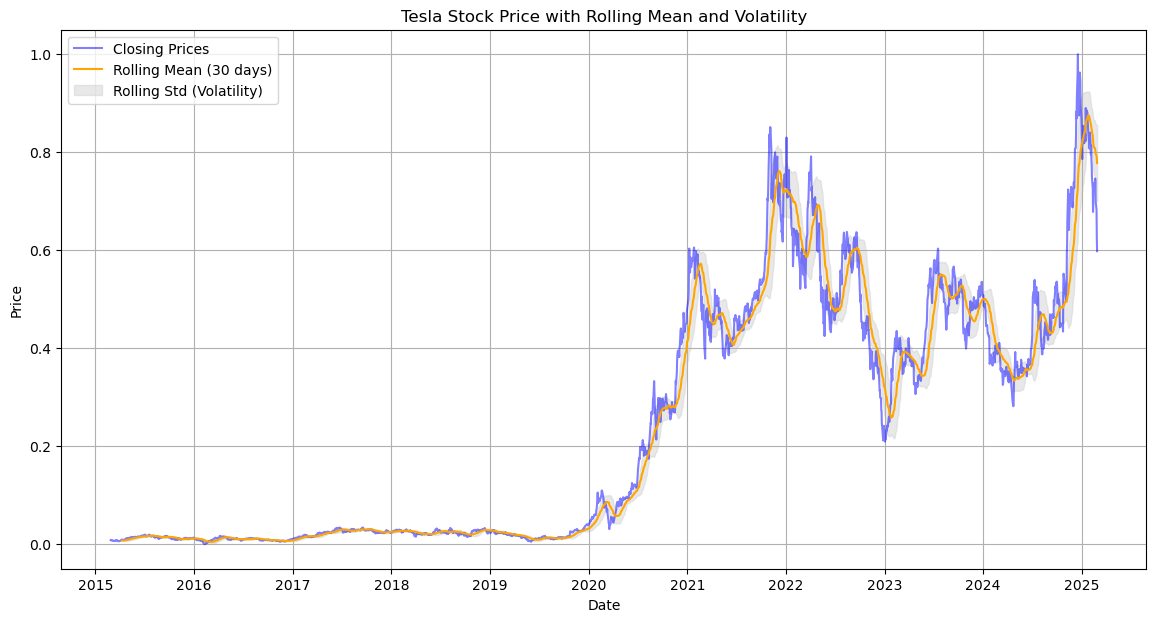

In [92]:


# Calculate rolling mean and rolling standard deviation
historical_data['Rolling Mean'] = historical_data['Close'].rolling(window=window_size).mean()
historical_data['Rolling Std'] = historical_data['Close'].rolling(window=window_size).std()

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot the closing prices
plt.plot(historical_data['Close'], label='Closing Prices', color='blue', alpha=0.5)

# Plot the rolling mean
plt.plot(historical_data['Rolling Mean'], label=f'Rolling Mean ({window_size} days)', color='orange')

# Plot the rolling standard deviation
plt.fill_between(historical_data.index, 
                 historical_data['Rolling Mean'] - historical_data['Rolling Std'], 
                 historical_data['Rolling Mean'] + historical_data['Rolling Std'], 
                 color='lightgrey', alpha=0.5, label='Rolling Std (Volatility)')

# Title and labels
plt.title('Tesla Stock Price with Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Task2 Time Series Forecasting Models

# Required libraries 

In [93]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [94]:
ts = historical_data['Close']

# Check for stationarity
result = adfuller(ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.4488630923582309
p-value: 0.5586395540813314


In [95]:
# If p-value > 0.05, the series is not stationary. We need to difference the data.
# Differencing the data
ts_diff = ts.diff().dropna()

In [96]:
# Fit ARIMA model (adjust p, d, q as needed)
model = ARIMA(ts, order=(5, 1, 0))  # Example with p=5, d=1, q=0
model_fit = model.fit()

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [97]:
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2515
Model:                 ARIMA(5, 1, 0)   Log Likelihood                7204.740
Date:                Fri, 28 Feb 2025   AIC                         -14397.480
Time:                        22:53:52   BIC                         -14362.503
Sample:                             0   HQIC                        -14384.785
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0100      0.012     -0.803      0.422      -0.034       0.014
ar.L2          0.0163      0.011      1.515      0.130      -0.005       0.037
ar.L3         -0.0004      0.013     -0.031      0.9

In [98]:
# Forecasting
forecast_steps = 30  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


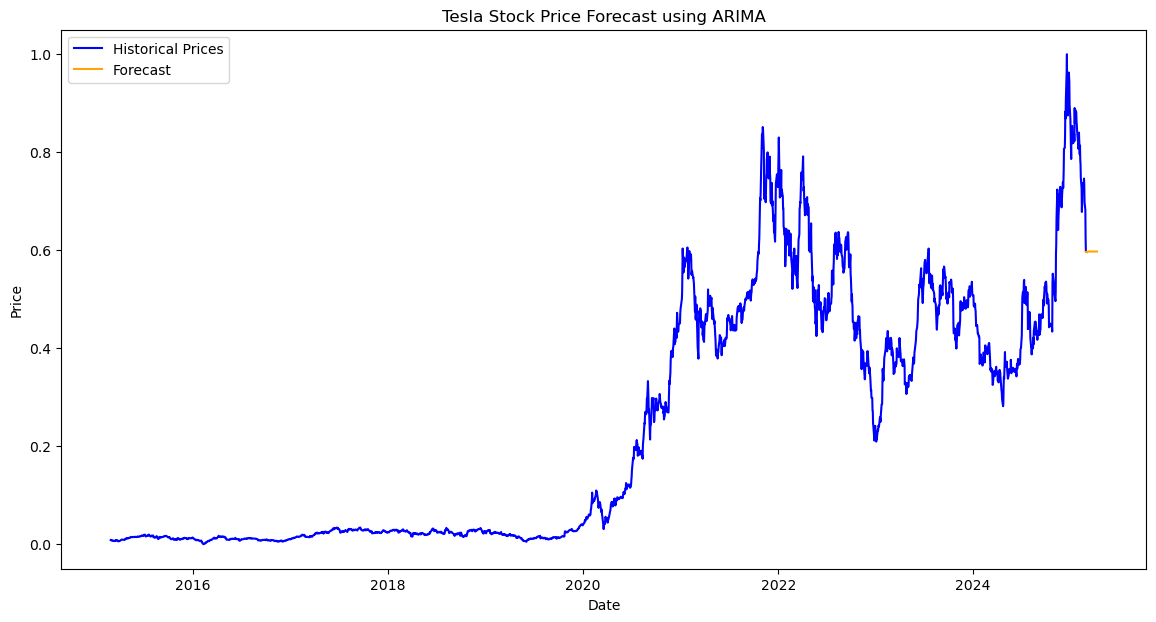

In [99]:

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(ts, label='Historical Prices', color='blue')
plt.plot(pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), 
                       periods=forecast_steps, freq='B'), 
         forecast, label='Forecast', color='orange')
plt.title('Tesla Stock Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()